/var/folders/0j/8rw9s9dd56v924gjnszhk07m0000gn/T/ipykernel_77039/3687738619.py:6: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


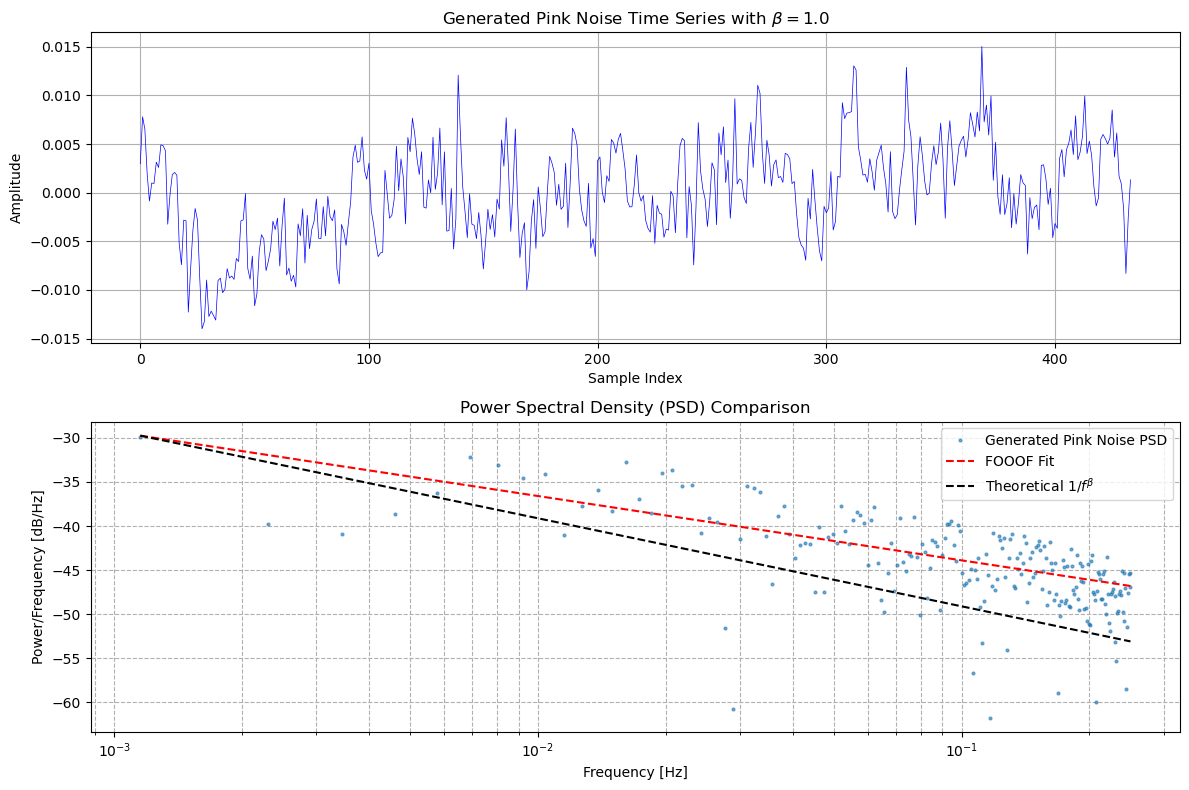

In [ ]:
from pink_noise.pink_noise_generator import generate_pink_noise_fft, generate_coloured_noise, generate_coloured_noise1, generate_coloured_noise_psd
from fooof import FOOOF
from scipy.signal import welch

def main():
    Fs = 0.5          # Sampling frequency in Hz
    n_samples = 434   # Number of samples (16384)
    T = 1.0 / Fs        # Sampling interval in seconds
    alpha = 1.0         # Scaling factor for PSD
    beta = 1.0          # Exponent for pink noise (1/f noise)
    scaling_factor = 0.005  # No additional scaling
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Generate pink noise
    noise, _ = generate_pink_noise_fft(n_samples, T, alpha, beta, scaling_factor, normalise = True, device=device)
    #noise, _ = generate_pink_noise(n_samples, T, alpha, beta, scaling_factor)
    
    noise_np = noise.cpu().numpy()

    # Plot the time series
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(noise_np, color='blue', linewidth=0.5)
    plt.title(r"Generated Pink Noise Time Series with $\beta = 1.0$")
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()

    # Compute PSD using Welch's method (using the full length for high frequency resolution)
    f, Pxx = welch(noise_np, fs=Fs, nperseg=n_samples, scaling='density')

    freq_range = [0.01, 0.1]

    # Initialise and fit FOOOF—disable oscillatory peak detection with max_n_peaks=0,
    # and use fixed aperiodic mode since we're modeling pure pink noise.
    fm = FOOOF(max_n_peaks=0, aperiodic_mode='fixed')
    # Exclude zero or negative frequencies
    positive_freqs = f[f > 0]
    positive_Pxx = Pxx[f > 0]

    # Fit FOOOF to the PSD within the defined frequency range
    fm.fit(positive_freqs, positive_Pxx, freq_range)

    # Extract the aperiodic parameters (offset and exponent)
    offset, exponent = fm.aperiodic_params_

    # Compute the fitted aperiodic line (in dB) over the positive frequencies used in the fit
    fit_line = -10 * exponent * np.log10(positive_freqs) + 10 * offset
    # Compute the theoretical 1/f line for beta (here beta=1.0)
    theo_line = -10 * beta * np.log10(positive_freqs) + 10 * offset
    # Align the theoretical line with the fitted line at the first frequency
    diff = fit_line[0] - theo_line[0]
    theo_line += diff

    # Plot the PSD and the fit lines
    plt.subplot(2, 1, 2)
    plt.semilogx(positive_freqs, 10 * np.log10(positive_Pxx), 'o', markersize=2,
                 label='Generated Pink Noise PSD', alpha=0.6)
    plt.semilogx(positive_freqs, fit_line, label='FOOOF Fit', linestyle='--', color='red')
    plt.semilogx(positive_freqs, theo_line, label=r'Theoretical $1/f^{\beta}$', linestyle='--', color='black')
    plt.title("Power Spectral Density (PSD) Comparison")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power/Frequency [dB/Hz]')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


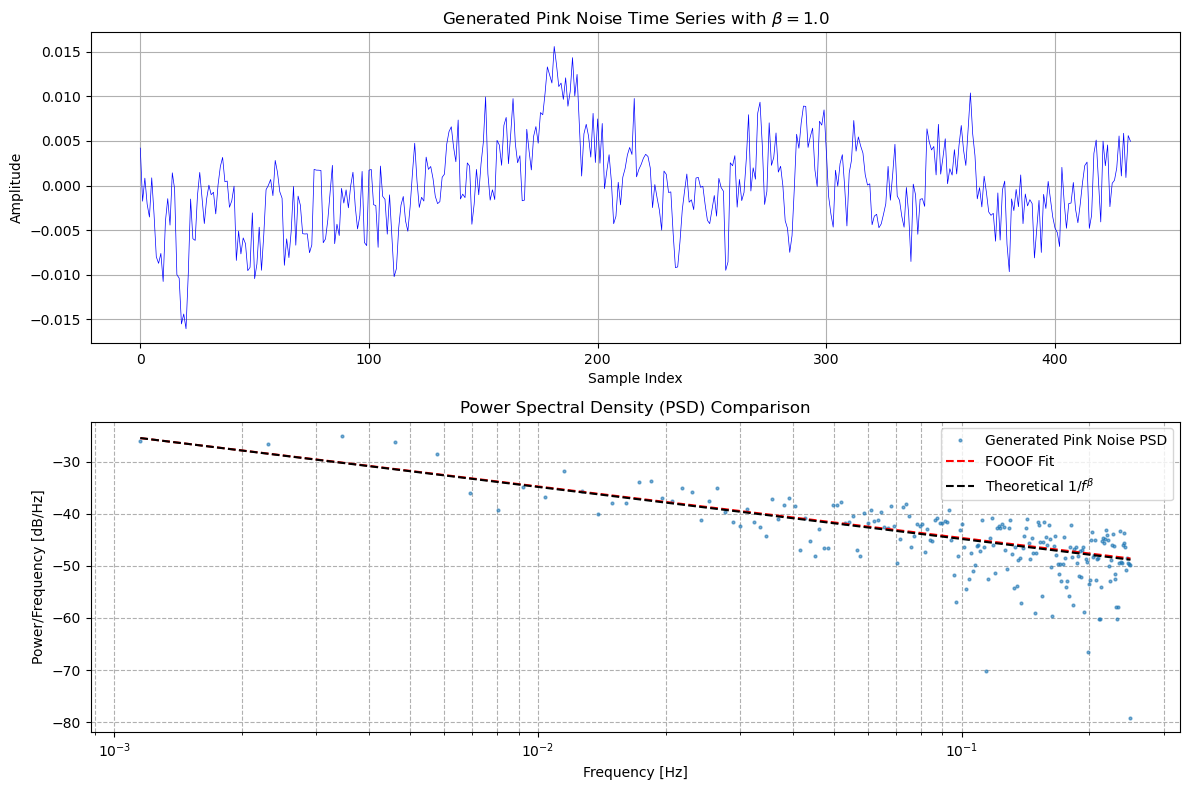

In [ ]:
from pink_noise.pink_noise_generator import generate_pink_noise_fft, generate_coloured_noise, generate_coloured_noise1, generate_coloured_noise_psd
from fooof import FOOOF
from scipy.signal import welch

def main():
    Fs = 0.5          # Sampling frequency in Hz
    n_samples = 434   # Number of samples (16384)
    T = 1.0 / Fs        # Sampling interval in seconds
    alpha = 1.0         # Scaling factor for PSD
    beta = 1.0          # Exponent for pink noise (1/f noise)
    scaling_factor = 0.005  # No additional scaling
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Generate pink noise
    noise, _ = generate_coloured_noise(n_samples, Fs, alpha, beta, scaling_factor, normalise = True, device=device)
    #noise, _ = generate_pink_noise(n_samples, T, alpha, beta, scaling_factor)
    
    noise_np = noise.cpu().numpy()

    # Plot the time series
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(noise_np, color='blue', linewidth=0.5)
    plt.title(r"Generated Pink Noise Time Series with $\beta = 1.0$")
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()

    # Compute PSD using Welch's method (using the full length for high frequency resolution)
    f, Pxx = welch(noise_np, fs=Fs, nperseg=n_samples, scaling='density')

    freq_range = [0.01, 0.1]

    # Initialise and fit FOOOF—disable oscillatory peak detection with max_n_peaks=0,
    # and use fixed aperiodic mode since we're modeling pure pink noise.
    fm = FOOOF(max_n_peaks=0, aperiodic_mode='fixed')
    # Exclude zero or negative frequencies
    positive_freqs = f[f > 0]
    positive_Pxx = Pxx[f > 0]

    # Fit FOOOF to the PSD within the defined frequency range
    fm.fit(positive_freqs, positive_Pxx, freq_range)

    # Extract the aperiodic parameters (offset and exponent)
    offset, exponent = fm.aperiodic_params_

    # Compute the fitted aperiodic line (in dB) over the positive frequencies used in the fit
    fit_line = -10 * exponent * np.log10(positive_freqs) + 10 * offset
    # Compute the theoretical 1/f line for beta (here beta=1.0)
    theo_line = -10 * beta * np.log10(positive_freqs) + 10 * offset
    # Align the theoretical line with the fitted line at the first frequency
    diff = fit_line[0] - theo_line[0]
    theo_line += diff

    plt.subplot(2, 1, 2)
    plt.semilogx(positive_freqs, 10 * np.log10(positive_Pxx), 'o', markersize=2,
                 label='Generated Pink Noise PSD', alpha=0.6)
    plt.semilogx(positive_freqs, fit_line, label='FOOOF Fit', linestyle='--', color='red')
    plt.semilogx(positive_freqs, theo_line, label=r'Theoretical $1/f^{\beta}$', linestyle='--', color='black')
    plt.title("Power Spectral Density (PSD) Comparison")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power/Frequency [dB/Hz]')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


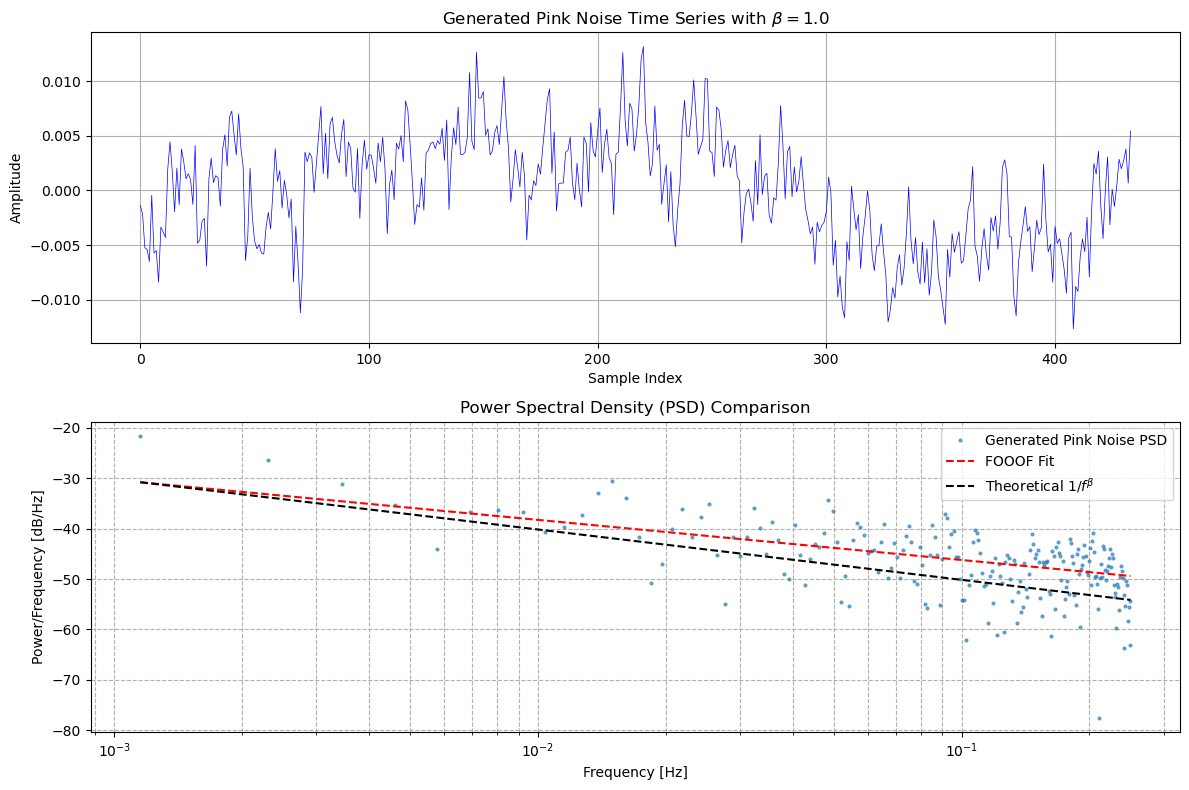

In [ ]:
from pink_noise.pink_noise_generator import generate_pink_noise_fft, generate_coloured_noise, generate_coloured_noise1, generate_coloured_noise_psd
from fooof import FOOOF
from scipy.signal import welch

def main():
    Fs = 0.5          # Sampling frequency in Hz
    n_samples = 434   # Number of samples (16384)
    T = 1.0 / Fs        # Sampling interval in seconds
    alpha = 1.0         # Scaling factor for PSD
    beta = 1.0          # Exponent for pink noise (1/f noise)
    scaling_factor = 0.005 # No additional scaling
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Generate pink noise
    noise, _ = generate_coloured_noise1(n_samples, Fs, alpha, beta, scaling_factor, normalise = True, device=device)
    #noise, _ = generate_pink_noise(n_samples, T, alpha, beta, scaling_factor)
    
    noise_np = noise.cpu().numpy()

    # Plot the time series
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(noise_np, color='blue', linewidth=0.5)
    plt.title(r"Generated Pink Noise Time Series with $\beta = 1.0$")
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()

    # Compute PSD using Welch's method (using the full length for high frequency resolution)
    f, Pxx = welch(noise_np, fs=Fs, nperseg=n_samples, scaling='density')


    freq_range = [0.01, 0.1]

    # Initialise and fit FOOOF—disable oscillatory peak detection with max_n_peaks=0,
    # and use fixed aperiodic mode since we're modeling pure pink noise.
    fm = FOOOF(max_n_peaks=0, aperiodic_mode='fixed')
    # Exclude zero or negative frequencies
    positive_freqs = f[f > 0]
    positive_Pxx = Pxx[f > 0]

    # Fit FOOOF to the PSD within the defined frequency range
    fm.fit(positive_freqs, positive_Pxx, freq_range)

    # Extract the aperiodic parameters (offset and exponent)
    offset, exponent = fm.aperiodic_params_

    # Compute the fitted aperiodic line (in dB) over the positive frequencies used in the fit
    fit_line = -10 * exponent * np.log10(positive_freqs) + 10 * offset
    # Compute the theoretical 1/f line for beta (here beta=1.0)
    theo_line = -10 * beta * np.log10(positive_freqs) + 10 * offset
    # Align the theoretical line with the fitted line at the first frequency
    diff = fit_line[0] - theo_line[0]
    theo_line += diff

    # Plot the PSD and the fit lines
    plt.subplot(2, 1, 2)
    plt.semilogx(positive_freqs, 10 * np.log10(positive_Pxx), 'o', markersize=2,
                 label='Generated Pink Noise PSD', alpha=0.6)
    plt.semilogx(positive_freqs, fit_line, label='FOOOF Fit', linestyle='--', color='red')
    plt.semilogx(positive_freqs, theo_line, label=r'Theoretical $1/f^{\beta}$', linestyle='--', color='black')
    plt.title("Power Spectral Density (PSD) Comparison")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power/Frequency [dB/Hz]')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


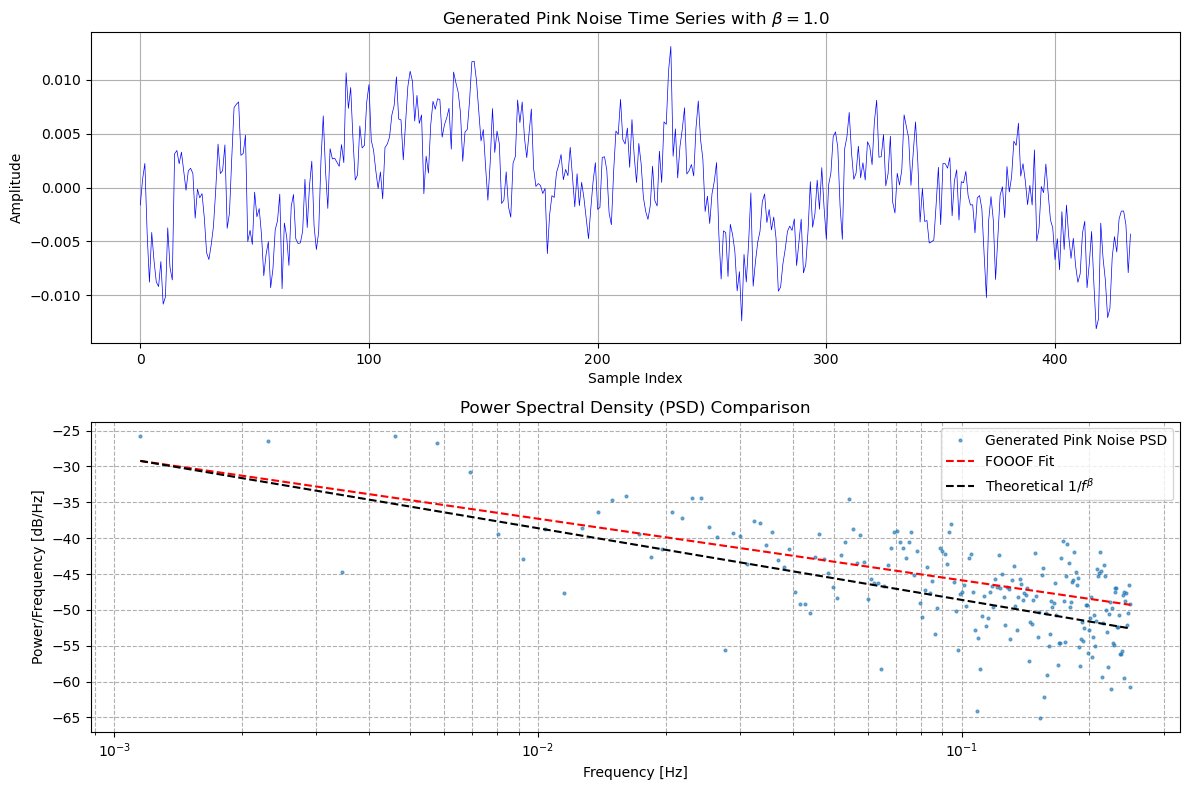

In [ ]:
from pink_noise.pink_noise_generator import generate_pink_noise_fft, generate_coloured_noise, generate_coloured_noise1, generate_coloured_noise_psd
from fooof import FOOOF
from scipy.signal import welch


def main():

    Fs = 0.5          # Sampling frequency in Hz
    n_samples = 434   # Number of samples (16384)
    T = 1.0 / Fs        # Sampling interval in seconds
    alpha = 1.0         # Scaling factor for PSD
    beta = 1.0          # Exponent for pink noise (1/f noise)
    scaling_factor = 0.005  # No additional scaling
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Generate pink noise
    noise, _ = generate_coloured_noise_psd(n_samples, Fs, alpha, beta, scaling_factor, normalise = True, device=device)
    #noise, _ = generate_pink_noise(n_samples, T, alpha, beta, scaling_factor)
    
    noise_np = noise.cpu().numpy()

    # Plot the time series
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(noise_np, color='blue', linewidth=0.5)
    plt.title(r"Generated Pink Noise Time Series with $\beta = 1.0$")
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()

    # Compute PSD using Welch's method (using the full length for high frequency resolution)
    f, Pxx = welch(noise_np, fs=Fs, nperseg=n_samples, scaling='density')


    freq_range = [0.01, 0.1]

    # Initialise and fit FOOOF—disable oscillatory peak detection with max_n_peaks=0,
    # and use fixed aperiodic mode since we're modeling pure pink noise.
    fm = FOOOF(max_n_peaks=0, aperiodic_mode='fixed')
    # Exclude zero or negative frequencies
    positive_freqs = f[f > 0]
    positive_Pxx = Pxx[f > 0]

    # Fit FOOOF to the PSD within the defined frequency range
    fm.fit(positive_freqs, positive_Pxx, freq_range)

    # Extract the aperiodic parameters (offset and exponent)
    offset, exponent = fm.aperiodic_params_

    # Compute the fitted aperiodic line (in dB) over the positive frequencies used in the fit
    fit_line = -10 * exponent * np.log10(positive_freqs) + 10 * offset
    # Compute the theoretical 1/f line for beta (here beta=1.0)
    theo_line = -10 * beta * np.log10(positive_freqs) + 10 * offset
    # Align the theoretical line with the fitted line at the first frequency
    diff = fit_line[0] - theo_line[0]
    theo_line += diff

    plt.subplot(2, 1, 2)
    plt.semilogx(positive_freqs, 10 * np.log10(positive_Pxx), 'o', markersize=2,
                 label='Generated Pink Noise PSD', alpha=0.6)
    plt.semilogx(positive_freqs, fit_line, label='FOOOF Fit', linestyle='--', color='red')
    plt.semilogx(positive_freqs, theo_line, label=r'Theoretical $1/f^{\beta}$', linestyle='--', color='black')
    plt.title("Power Spectral Density (PSD) Comparison")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power/Frequency [dB/Hz]')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
